In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('Employee_data.csv')
data

,EmployeeNumber,Age,Gender,Education Level,NoOfProjects,Experiences,PerformanceRating
0,1,41,Female,2,8,8,3
1,2,49,Male,1,1,10,4
2,4,37,Male,2,6,7,3
3,5,33,Female,4,1,8,3
4,7,27,Male,1,9,6,3
...,...,...,...,...,...,...,...
1465,2061,36,Male,2,4,17,3
1466,2062,39,Male,1,4,9,3
1467,2064,27,Male,3,1,6,4
1468,2065,49,Male,3,2,17,3


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,EmployeeNumber,Age,Gender,Education Level,NoOfProjects,Experiences,PerformanceRating
0,1,41,0,2,8,8,3
1,2,49,1,1,1,10,4
2,4,37,1,2,6,7,3
3,5,33,0,4,1,8,3
4,7,27,1,1,9,6,3


array([[<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Education Level'}>,
        <Axes: title={'center': 'NoOfProjects'}>,
        <Axes: title={'center': 'Experiences'}>],
       [<Axes: title={'center': 'PerformanceRating'}>, <Axes: >,
        <Axes: >]], dtype=object)

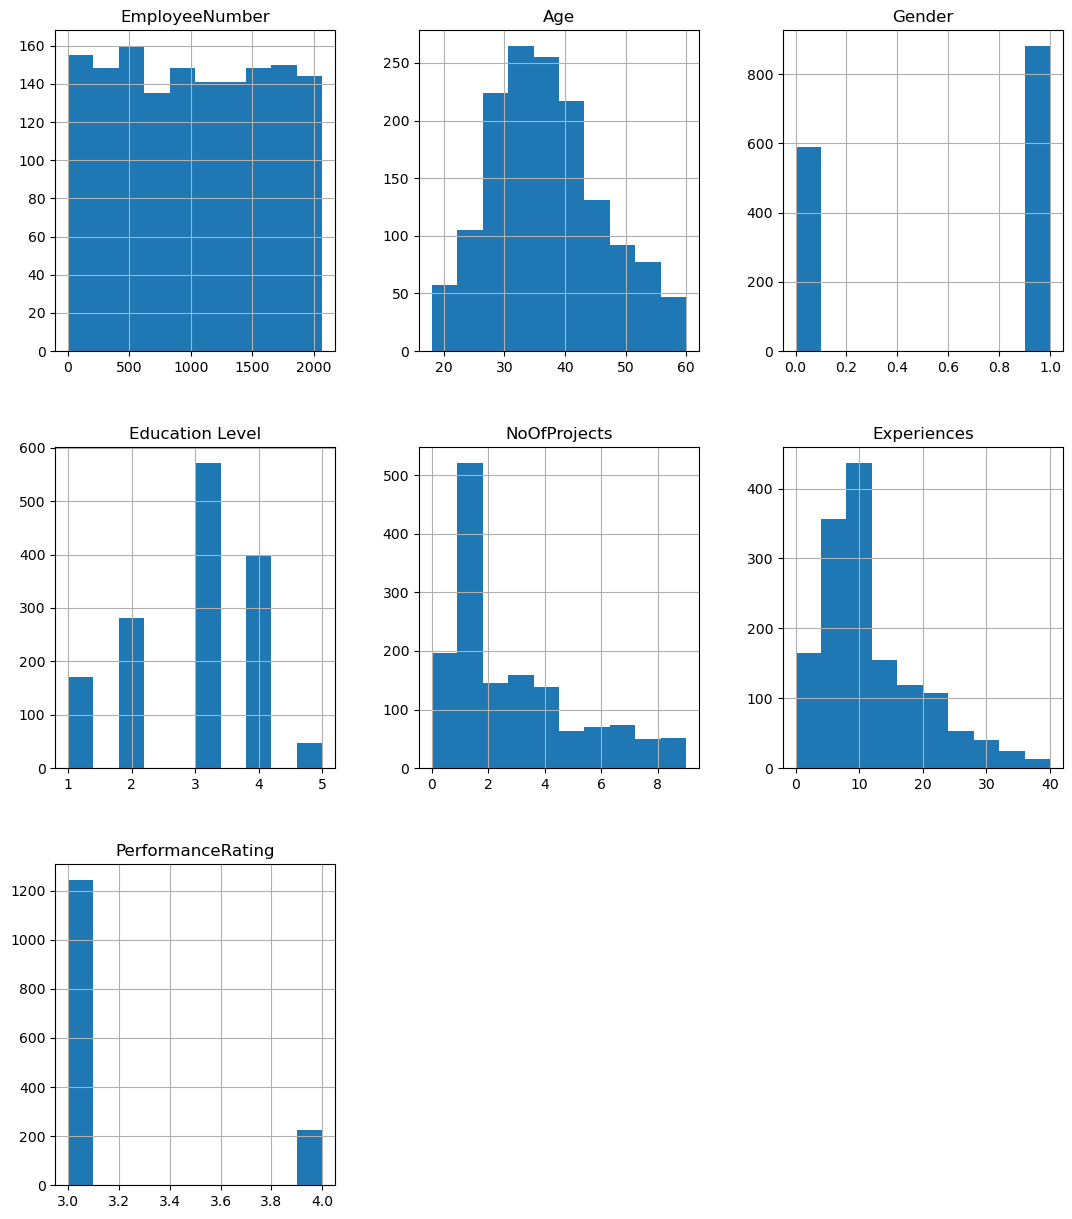

In [7]:
data.hist(figsize=(13,15))


<Axes: xlabel='PerformanceRating', ylabel='count'>

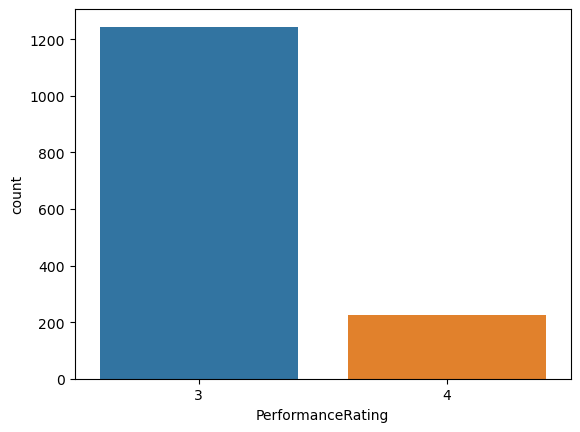

In [8]:
sns.countplot(data=data,x='PerformanceRating')

In [9]:
data.isna().sum()

EmployeeNumber       0
Age                  0
Gender               0
Education Level      0
NoOfProjects         0
Experiences          0
PerformanceRating    0
dtype: int64

In [10]:
x=data.iloc[:,:-1]
x

,EmployeeNumber,Age,Gender,Education Level,NoOfProjects,Experiences
0,1,41,0,2,8,8
1,2,49,1,1,1,10
2,4,37,1,2,6,7
3,5,33,0,4,1,8
4,7,27,1,1,9,6
...,...,...,...,...,...,...
1465,2061,36,1,2,4,17
1466,2062,39,1,1,4,9
1467,2064,27,1,3,1,6
1468,2065,49,1,3,2,17


In [11]:
y=data.iloc[:,-1:]
y

,PerformanceRating
0,3
1,4
2,3
3,3
4,3
...,...
1465,3
1466,3
1467,4
1468,3


<Axes: >

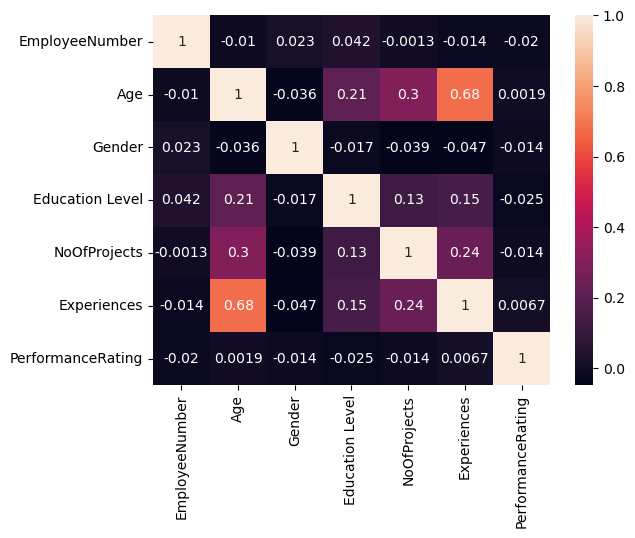

In [12]:
sns.heatmap(data.corr(), annot=True)


# Build the Naive Bayes Model

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)


In [26]:
from sklearn.naive_bayes import GaussianNB
gas =GaussianNB()
gas.fit(xtrain,ytrain)
print('training was completed')
print()
gaspred = gas.predict(xtest)
print('The predicted values is :\n',gaspred)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_gas = accuracy_score(ytest,gaspred)
print('Accuracy Score:\t', accuracy_gas)
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,gaspred))
print()
print('Classification report :\n',classification_report(ytest,gaspred))

training was completed

The predicted values is :
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Accuracy Score:	 0.8537414965986394

Confusion Matrix:
 [[251   0]
 [ 43   0]]

Classification report :
               precision    recall  f1-score   support

           3       0.85      1.00      0.92       251
           4       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      

C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p

In [ ]:
#multi

In [15]:
from sklearn.naive_bayes import MultinomialNB
mul =MultinomialNB()
mul.fit(xtrain,ytrain)
print('training was completed')
print()
mulpred = mul.predict(xtest)
print('The predicted values is :\n',mulpred)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_mul = accuracy_score(ytest,mulpred)
print('Accuracy Score:\t',accuracy_mul)
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,mulpred))
print()
print('Classification report :\n',classification_report(ytest,mulpred))

training was completed

The predicted values is :
 [3 4 3 4 4 3 3 4 4 4 3 3 4 4 3 3 3 3 4 3 3 4 3 4 3 3 3 3 3 4 3 3 3 4 3 3 3
 3 4 3 4 3 3 3 3 4 3 3 4 3 4 3 4 3 3 3 4 3 3 3 3 3 3 4 3 4 3 3 3 3 3 4 4 4
 3 4 3 3 3 3 4 4 3 3 3 3 3 4 3 4 4 4 3 3 4 4 3 4 3 4 4 3 3 3 4 3 4 3 4 4 3
 3 3 3 3 4 4 4 3 3 3 3 3 3 4 3 3 3 4 4 3 3 4 3 3 3 3 3 3 4 3 4 3 4 3 3 4 3
 4 4 4 3 4 3 3 3 3 3 4 3 3 3 3 3 3 3 4 3 4 4 4 3 3 3 4 3 3 4 3 3 4 3 4 3 4
 3 3 4 3 3 3 4 3 3 3 3 3 4 3 4 3 3 3 4 4 4 4 3 3 4 3 3 3 3 3 3 4 3 4 3 4 3
 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 3 3 3 3 4 3 4 3 3 4 4 4 3 4 4 3 3
 3 3 3 3 3 3 4 4 3 4 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3]
Accuracy Score:	 0.5850340136054422

Confusion Matrix:
 [[164  87]
 [ 35   8]]

Classification report :
               precision    recall  f1-score   support

           3       0.82      0.65      0.73       251
           4       0.08      0.19      0.12        43

    accuracy                           0.59       294
   macro avg       0.45      

C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.naive_bayes import BernoulliNB
ber =BernoulliNB()
ber.fit(xtrain,ytrain)
print('training was completed')
print()
berpred = ber.predict(xtest)
print('The predicted values is :\n',berpred)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_ber = accuracy_score(ytest,berpred)
print('Accuracy Score:\t', accuracy_ber)
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,berpred))
print()
print('Classification report :\n',classification_report(ytest,berpred))


training was completed

The predicted values is :
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Accuracy Score:	 0.8537414965986394

Confusion Matrix:
 [[251   0]
 [ 43   0]]

Classification report :
               precision    recall  f1-score   support

           3       0.85      1.00      0.92       251
           4       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      

C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p

In [17]:
# bagging classifier

In [19]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=gas,n_estimators=5,random_state=1)
bag.fit(xtrain,ytrain)
bagpred = bag.predict(xtest)
print('&'*100)
print('the predication of bag is:\n',bagpred)
print()
print('&'*100)
accuracy_bag = accuracy_score(ytest,bagpred)
print('Accuracy Score:\t',accuracy_bag)
print('&'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,bagpred))
print('&'*100)
print('Classification report :\n',classification_report(ytest,bagpred))

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the predication of bag is:
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Accuracy Score:	 0.8537414965986394
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Confusion Matrix:
 [[251   0]
 [ 43

C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p

In [20]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=10,random_state=1)
ran.fit(xtrain,ytrain)
ranpred = ran.predict(xtest)
print('&'*100)
print('the predication of bag is:\n',ranpred)
print()
print('&'*100)
accuracy_ran = accuracy_score(ytest,ranpred)
print('Accuracy Score:\t',accuracy_ran)
print('&'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ranpred))
print('&'*100)
print('Classification report :\n',classification_report(ytest,ranpred))

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the predication of bag is:
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Accuracy Score:	 0.8333333333333334
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Confusion Matrix:
 [[244   7]
 [ 42

C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_35144\2945233237.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran.fit(xtrain,ytrain)


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)

et.fit(xtrain,ytrain)
etpred = et.predict(xtest)
print('&'*100)
print('the predication of bag is:\n',etpred)
print()
print('&'*100)
accuracy_et = accuracy_score(ytest,etpred)
print('Accuracy Score:\t',accuracy_et)
print('&'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,etpred))
print('&'*100)
print('Classification report :\n',classification_report(ytest,etpred))

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the predication of bag is:
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_35144\2840016628.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(xtrain,ytrain)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the RandomForestClassifier with proper parameters
rand_for_1 = RandomForestClassifier(n_estimators=10, random_state=1, max_depth=None)

# Train the model on your training data
rand_for_1.fit(xtrain, ytrain)

# Test the model by making predictions on the test data
ypred_rand_1 = rand_for_1.predict(xtest)

# Calculate and print the accuracy score
accuracy_rand_1 = accuracy_score(ytest, ypred_rand_1)
print("Accuracy Score:", accuracy_rand_1)

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred_rand_1))

# Print the classification report
print("Classification Report:\n", classification_report(ytest, ypred_rand_1))


Accuracy Score: 0.8333333333333334
Confusion Matrix:
 [[244   7]
 [ 42   1]]
Classification Report:
               precision    recall  f1-score   support

           3       0.85      0.97      0.91       251
           4       0.12      0.02      0.04        43

    accuracy                           0.83       294
   macro avg       0.49      0.50      0.47       294
weighted avg       0.75      0.83      0.78       294



C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_35144\1503636722.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_for_1.fit(xtrain, ytrain)


# Model with Accuracy Scores

In [27]:
from sklearn.metrics import accuracy_score
import pandas as pd


scores = [
    ('Gaussian_NB', accuracy_gas),
    ('Multinomial NB', accuracy_mul),
    ('Bernoulli NB', accuracy_ber),
    ('Bagging classifier', accuracy_bag),
    ('RandomForest Classifier', accuracy_ran),
    ('RandomForest Classifier with pruning', accuracy_rand_1),
    ('ExtraTrees Classifier', accuracy_et)
]


Acc_scores = pd.DataFrame(scores, columns=['Model', 'Accuracy_score'])


print(Acc_scores.sort_values(by='Accuracy_score', ascending=False))




                                  Model  Accuracy_score
0                           Gaussian_NB        0.853741
2                          Bernoulli NB        0.853741
3                    Bagging classifier        0.853741
4               RandomForest Classifier        0.833333
5  RandomForest Classifier with pruning        0.833333
6                 ExtraTrees Classifier        0.829932
1                        Multinomial NB        0.585034


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial NB'),
  Text(2, 0, 'Bernoulli NB'),
  Text(3, 0, 'Bagging classifier'),
  Text(4, 0, 'RandomForest Classifier'),
  Text(5, 0, 'RandomForest Classifier with pruning'),
  Text(6, 0, 'ExtraTrees Classifier')])

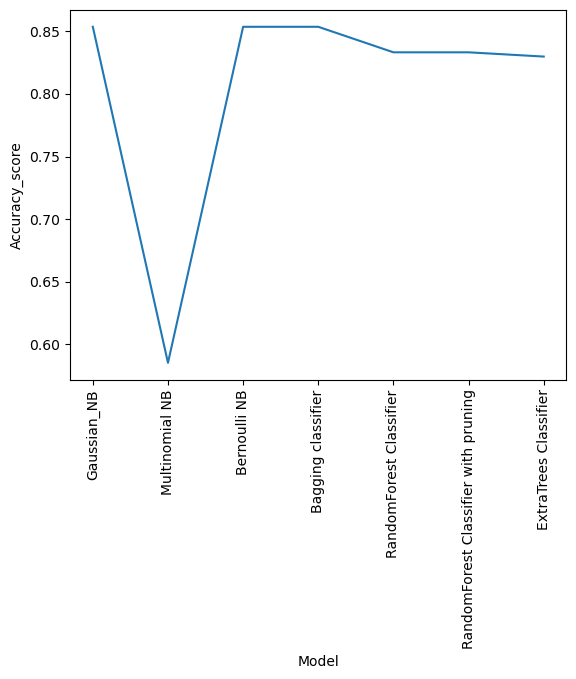

In [28]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)

# Bagging Implementation using Regression model

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=42)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (1102, 6)

Training data-y- Shape:	 (1102, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (368, 6)

Testing data(y-Outcome) Shape:	 (368, 1)


In [30]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('Training Started...\n')
print()
lin_reg.fit(xtrain,ytrain)
print()
print('Training Completed.....\n')
print()
print('Testing invoked....\n')
ypred=lin_reg.predict(xtest)
print('Predict Total Payment\n',ypred)
print('\n Testing is also Completed...\n')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest,ypred))
print()
print('RMSE: \t', np. sqrt (mean_squared_error(ytest,ypred)))
print()
print('Variance Score:\t', explained_variance_score(ytest,ypred))
print()
print('R-Square: \t', r2_score(ytest,ypred))

Training Started...



Training Completed.....


Testing invoked....

Predict Total Payment
 [[3.13828368]
 [3.16145989]
 [3.14174549]
 [3.20225849]
 [3.19692194]
 [3.16059661]
 [3.16063148]
 [3.15909588]
 [3.19140022]
 [3.18466119]
 [3.12513412]
 [3.15276469]
 [3.15495591]
 [3.15753732]
 [3.13090685]
 [3.12499364]
 [3.13834   ]
 [3.15667693]
 [3.15657031]
 [3.15301153]
 [3.17897068]
 [3.18389717]
 [3.12248865]
 [3.17452758]
 [3.12744706]
 [3.15029209]
 [3.14544411]
 [3.15915159]
 [3.12573497]
 [3.17500836]
 [3.13556284]
 [3.16606328]
 [3.15964659]
 [3.16762376]
 [3.1265564 ]
 [3.1522742 ]
 [3.16355406]
 [3.1445317 ]
 [3.1672542 ]
 [3.11999713]
 [3.17090225]
 [3.13980725]
 [3.13023592]
 [3.1394541 ]
 [3.15469695]
 [3.18658623]
 [3.1312277 ]
 [3.15441096]
 [3.17456627]
 [3.14193844]
 [3.18927071]
 [3.16040125]
 [3.19326144]
 [3.1507644 ]
 [3.12815584]
 [3.15713875]
 [3.1927026 ]
 [3.13249533]
 [3.17016962]
 [3.12957716]
 [3.1209161 ]
 [3.1456379 ]
 [3.12525933]
 [3.18531538]
 [3.1686491

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)

****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Linear Regression:	 -0.01566421792050332

MSE-linear Regression:	 0.1291104937935777

RMSE linear Regression:	 0.3593194870774165


In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
print('*'*100)
print('KNN Regression Model')
print('*'*100)
print('\n Training Phase')
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_knn=knn_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('KNN Regression - Performance Measures')
print('*'*100)
Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))
print('Accuracy Score - knn Regression:\t',Accuracy_knn_reg)
print()
print('MSE-knn Regression:\t',MSE_knn)
print()
print('RMSE knn Regression:\t',RMSE_knn)

****************************************************************************************************
KNN Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
KNN Regression - Performance Measures
****************************************************************************************************
Accuracy Score - knn Regression:	 -0.3799851550650275

MSE-knn Regression:	 0.1754227053140097

RMSE knn Regression:	 0.41883493802930255


# decession tree 

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print('Accuracy Score - DT Regression:\t',Accuracy_dt_reg)
print()
print('MSE-DT Regression:\t',MSE_dt_reg)
print()
print('RMSE DT Regression:\t',RMSE_dt_reg)

****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - DT Regression:	 -1.4155678187627068

MSE-DT Regression:	 0.3070652173913043

RMSE DT Regression:	 0.5541346563709081


# svr

In [35]:
from sklearn.svm import SVR
svr=SVR()
print('*'*100)
print('SVR Regression Model')
print('*'*100)
print('\n Training Phase')
svr.fit(xtrain,ytrain)
print('Hyperparameter:\n',svr.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_svr=svr.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('SVR Regression - Performance Measures')
print('*'*100)
Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(mean_squared_error(ytest,ypred_svr))
print('Accuracy Score - SVR Regression:\t',Accuracy_svr)
print()
print('MSE-SVR Regression:\t',MSE_svr)
print()
print('RMSE SVR Regression:\t',RMSE_svr)

****************************************************************************************************
SVR Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
SVR Regression - Performance Measures
****************************************************************************************************
Accuracy Score - SVR Regression:	 -0.019313251385852936

MSE-SVR Regression:	 0.12957435626334665

RMSE SVR Regression:	 0.3599643819370837


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Boosting - Adaboost with the base model - Linreg


In [36]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Adaboost Regression - Performance Measures')
print('*'*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))
print('Accuracy Score - Adaboost Regression:\t',Accuracy_ada)
print()
print('MSE-Adaboost Regression:\t',MSE_ada)
print()
print('RMSE Adaboost Regression:\t',RMSE_ada)


****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__normalize': 'deprecated', 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Adaboost Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Adaboost Regression:	 -0.005160233396707348

MSE-Adaboost Regression:	 0.12777523495040996

RMSE Adaboost Regression:	 0.35

C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Boosting - GradientBoost

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=15)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('GradientBoosting Regression - Performance Measures')
print('*'*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))
print('Accuracy Score - GradientBoosting Regression:\t',Accuracy_grad_boost
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)

SyntaxError: '(' was never closed (150347195.py, line 25)